In [157]:
import psycopg2
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 85
pd.options.display.max_columns = 200

In [5]:
os.chdir("/Users/takeshisugiyama/Galvanize/capstone1/soccer-metrics/data/")

In [6]:
pwd

'/Users/takeshisugiyama/Galvanize/capstone1/soccer-metrics/data'

### Combine all csv file to one

In [7]:
extension = 'csv'
all_filenames =[i for i in glob.glob('*.{}'.format(extension))]

#combine all files in the list
df = pd.concat([pd.read_csv(f) for f in all_filenames])

In [8]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,GBH,GBD,GBA,BSH,BSD,BSA,SBH,SBD,SBA,Unnamed: 70,Unnamed: 71,Unnamed: 72
count,14460.000000,14460.000000,14458.000000,14458.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14459.000000,14458.000000,14459.000000,14459.000000,14459.000000,14457.000000,14457.000000,14457.000000,14443.000000,14443.000000,14443.000000,14429.000000,14429.000000,14429.000000,13005.000000,13005.000000,13005.000000,10110.000000,10110.000000,10110.000000,14453.000000,14453.000000,14453.000000,7332.000000,7332.000000,7332.000000,14439.000000,14439.00000,14439.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14460.000000,14459.000000,14459.000000,14459.000000,14459.000000,14431.000000,14431.000000,14431.000000,14431.000000,14431.000000,14431.000000,10118.000000,10118.000000,10118.000000,5767.000000,5767.000000,5767.000000,5771.000000,5771.000000,5771.000000,4300.000000,4300.000000,4300.000000,0.0,0.0,0.0
mean,1.576971,1.183817,0.699336,0.514317,14.142126,11.331420,5.311640,4.218065,13.481084,13.854969,5.828688,4.565807,1.929451,2.218480,0.096134,0.128294,2.739257,4.032750,4.900198,2.681419,3.971071,4.669802,2.594571,3.834299,4.405856,2.645388,3.910048,4.706061,2.897128,4.308529,5.253762,2.714838,3.843877,4.801081,2.601065,3.878054,4.798857,2.798538,4.11955,5.159481,40.626971,2.935954,2.714831,4.320252,3.979718,5.584033,4.830891,35.687759,1.949570,1.861620,2.143600,2.030490,22.554085,-0.335555,1.999696,1.932000,2.107063,2.023047,2.913671,4.331821,5.315469,2.532885,3.752180,4.479320,2.530213,3.746188,4.541804,2.497090,3.694825,4.420361,NaN,NaN,NaN
std,1.323296,1.161888,0.846609,0.724264,5.288358,4.624149,2.889869,2.511799,4.561423,4.649321,3.024713,2.615966,1.360671,1.408598,0.311220,0.360505,2.083734,1.405362,4.349966,1.933145,1.320041,3.940544,1.732584,1.067639,3.495849,1.892023,1.275674,4.190648,2.386505,1.783100,5.012195,1.995667,1.219043,4.303779,1.817056,1.167656,4.121797,2.240314,1.55439,5.077473,5.746061,2.466952,2.018820,1.813030,1.348433,5.968559,4.289218,5.975867,0.306386,0.279041,0.515075,0.446817,4.339440,0.837136,0.425110,0.359011,0.790906,0.635227,2.409431,1.859668,5.219135,1.638141,1.001178,3.291264,1.641708,0.987959,3.502468,1.649757,0.979472,3.340879,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.020000,1.400000,1.080000,1.030000,1.650000,1.090000,1.030000,1.500000,1.100000,1.040000,1.400000,1.060000,1.040000,2.200000,1.090000,1.020000,1.020000,1.080000,1.040000,1.400000,1.100000,1.030000,1.62000,1.080000,0.000000,1.050000,1.030000,1.330000,1.290000,1.100000,1.090000,3.000000,1.130000,1.090000,1.420000,1.380000,1.000000,-3.500000,1.010000,1.010000,1.060000,1.040000,1.050000,2.200000,1.080000,1.050000,1.450000,1.120000,1.040000,1.330000,1.120000,1.030000,2.100000,1.100000,NaN,NaN,NaN
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,10.000000,10.000000,4.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.660000,3.300000,2.500000,1.650000,3.300000,2.500000,1.650000,3.300000,2.500000,1.660000,3.300000,2.500000,1.680000,3.430000,2.510000,1.670000,3.200000,2.500000,1.670000,3.300000,2.600000,1.670000,3.40000,2.500000,36.000000,1.720000,1.660000,3.460000,3.290000,2.620000,2.490000,32.000000,1.730000,1.660000,1.820000,1.750000,20.000000,-0.750000,1.860000,1.810000,1.880000,1.830000,1.660000,3.420000,2.490000,1.670000,3.250000,2.600000,1.670000,3.250000,2.600000,1.650000,3.200000,2.550000,NaN,NaN,NaN
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,13.000000,14.000000,5.000000,4.00000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14466 entries, 0 to 305
Data columns (total 80 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Div          14460 non-null  object 
 1   Date         14460 non-null  object 
 2   HomeTeam     14460 non-null  object 
 3   AwayTeam     14460 non-null  object 
 4   FTHG         14460 non-null  float64
 5   FTAG         14460 non-null  float64
 6   FTR          14460 non-null  object 
 7   HTHG         14458 non-null  float64
 8   HTAG         14458 non-null  float64
 9   HTR          14458 non-null  object 
 10  HS           14459 non-null  float64
 11  AS           14459 non-null  float64
 12  HST          14459 non-null  float64
 13  AST          14459 non-null  float64
 14  HF           14459 non-null  float64
 15  AF           14459 non-null  float64
 16  HC           14459 non-null  float64
 17  AC           14459 non-null  float64
 18  HY           14458 non-null  float64
 19  AY    

In [10]:
missing = df.isna()
missing_sum = missing.sum()
missing_sum

Div                6
Date               6
HomeTeam           6
AwayTeam           6
FTHG               6
FTAG               6
FTR                6
HTHG               8
HTAG               8
HTR                8
HS                 7
AS                 7
HST                7
AST                7
HF                 7
AF                 7
HC                 7
AC                 7
HY                 8
AY                 7
HR                 7
AR                 7
B365H              9
B365D              9
B365A              9
BWH               23
BWD               23
BWA               23
IWH               37
IWD               37
IWA               37
LBH             1461
LBD             1461
LBA             1461
PSH             4356
PSD             4356
PSA             4356
WHH               13
WHD               13
WHA               13
SJH             7134
SJD             7134
SJA             7134
VCH               27
VCD               27
VCA               27
Bb1X2              6
BbMxH        

In [11]:
missing.mean()*100

Div              0.041477
Date             0.041477
HomeTeam         0.041477
AwayTeam         0.041477
FTHG             0.041477
FTAG             0.041477
FTR              0.041477
HTHG             0.055302
HTAG             0.055302
HTR              0.055302
HS               0.048389
AS               0.048389
HST              0.048389
AST              0.048389
HF               0.048389
AF               0.048389
HC               0.048389
AC               0.048389
HY               0.055302
AY               0.048389
HR               0.048389
AR               0.048389
B365H            0.062215
B365D            0.062215
B365A            0.062215
BWH              0.158994
BWD              0.158994
BWA              0.158994
IWH              0.255772
IWD              0.255772
IWA              0.255772
LBH             10.099544
LBD             10.099544
LBA             10.099544
PSH             30.111987
PSD             30.111987
PSA             30.111987
WHH              0.089866
WHD         

In [12]:
mask = missing.mean()*100 <= 1

In [13]:
mask

Div             True
Date            True
HomeTeam        True
AwayTeam        True
FTHG            True
FTAG            True
FTR             True
HTHG            True
HTAG            True
HTR             True
HS              True
AS              True
HST             True
AST             True
HF              True
AF              True
HC              True
AC              True
HY              True
AY              True
HR              True
AR              True
B365H           True
B365D           True
B365A           True
BWH             True
BWD             True
BWA             True
IWH             True
IWD             True
IWA             True
LBH            False
LBD            False
LBA            False
PSH            False
PSD            False
PSA            False
WHH             True
WHD             True
WHA             True
SJH            False
SJD            False
SJA            False
VCH             True
VCD             True
VCA             True
Bb1X2           True
BbMxH        

### Filtering out rows that are all NaN

In [14]:
df = df[mask.index[mask]]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14466 entries, 0 to 305
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       14460 non-null  object 
 1   Date      14460 non-null  object 
 2   HomeTeam  14460 non-null  object 
 3   AwayTeam  14460 non-null  object 
 4   FTHG      14460 non-null  float64
 5   FTAG      14460 non-null  float64
 6   FTR       14460 non-null  object 
 7   HTHG      14458 non-null  float64
 8   HTAG      14458 non-null  float64
 9   HTR       14458 non-null  object 
 10  HS        14459 non-null  float64
 11  AS        14459 non-null  float64
 12  HST       14459 non-null  float64
 13  AST       14459 non-null  float64
 14  HF        14459 non-null  float64
 15  AF        14459 non-null  float64
 16  HC        14459 non-null  float64
 17  AC        14459 non-null  float64
 18  HY        14458 non-null  float64
 19  AY        14459 non-null  float64
 20  HR        14459 non-null  floa

In [34]:
df[df.isna().all(axis=1)].head(80)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df[df.isna().any(axis=1)].head(80)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
218,I1,09/02/15,Lazio,Genoa,0.0,1.0,A,0.0,1.0,A,7.0,9.0,1.0,5.0,27.0,12.0,4.0,1.0,4.0,5.0,1.0,0.0,1.57,4.00,6.00,1.57,3.75,6.00,NaN,NaN,NaN,1.57,3.80,6.00,1.57,4.10,7.00,47.0,1.62,1.56,4.20,3.95,7.30,6.17,47.0,1.96,1.87,2.00,1.91,30.0,-1.00,2.08,1.98,1.94,1.86
247,I1,02/03/15,Roma,Juventus,1.0,1.0,D,0.0,0.0,D,8.0,10.0,3.0,1.0,11.0,16.0,1.0,5.0,NaN,5.0,1.0,0.0,3.30,3.30,2.25,3.10,3.20,2.30,3.00,3.20,2.30,3.10,3.10,2.40,3.40,3.25,2.38,45.0,3.45,3.20,3.35,3.21,2.40,2.31,43.0,2.29,2.16,1.77,1.68,23.0,0.25,1.94,1.88,2.02,1.97
253,I1,08/03/15,Napoli,Inter,2.0,2.0,D,0.0,0.0,D,17.0,13.0,7.0,5.0,16.0,19.0,5.0,5.0,1.0,3.0,1.0,0.0,1.95,3.50,4.00,1.95,3.40,3.75,1.75,3.50,4.50,NaN,NaN,NaN,1.87,3.50,4.30,45.0,1.97,1.91,3.70,3.49,4.60,4.10,44.0,1.91,1.82,2.05,1.96,26.0,-0.50,1.95,1.90,2.01,1.94
254,I1,08/03/15,Parma,Atalanta,0.0,0.0,D,0.0,0.0,D,14.0,8.0,4.0,2.0,24.0,18.0,5.0,4.0,1.0,2.0,1.0,0.0,3.75,3.20,2.15,3.50,3.10,2.15,NaN,NaN,NaN,3.20,3.10,2.30,3.70,3.10,2.20,37.0,3.77,3.50,3.35,3.21,2.30,2.17,32.0,2.42,2.23,1.68,1.63,21.0,0.25,2.06,1.98,1.93,1.86
275,I1,22/03/15,Parma,Torino,0.0,2.0,A,0.0,1.0,A,16.0,15.0,1.0,5.0,16.0,11.0,8.0,5.0,4.0,2.0,1.0,0.0,4.33,3.40,1.91,4.10,3.30,1.91,NaN,NaN,NaN,4.00,3.25,2.00,4.75,3.30,1.95,44.0,4.80,4.22,3.55,3.31,2.20,1.93,38.0,2.45,2.29,1.70,1.60,24.0,0.50,2.02,1.93,1.96,1.91
358,I1,18/05/15,Fiorentina,Parma,3.0,0.0,H,2.0,0.0,H,22.0,17.0,10.0,4.0,9.0,10.0,12.0,4.0,1.0,1.0,0.0,0.0,1.22,6.50,13.00,1.22,6.75,13.50,1.25,5.50,10.30,NaN,NaN,NaN,1.20,7.00,13.00,44.0,1.25,1.21,7.50,6.53,15.00,12.62,35.0,1.45,1.40,3.10,2.83,29.0,-2.00,2.04,1.97,1.96,1.88
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,I1,05/03/16,Napoli,Chievo,3.0,1.0,H,2.0,1.0,H,25.0,8.0,10.0,2.0,6.0,13.0,7.0,2.0,0.0,3.0,0.0,0.0,1.17,7.50,17.00,1.15,7.00,16.50,1.20,5.80,13.00,1.20,6.00,17.00,NaN,NaN,NaN,46.0,1.20,1.17,7.63,7.06,29.00,17.52,33.0,1.59,1.55,2.52,2.39,30.0,-2.00,1.96,1.92,1.99,1.94
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,I1,28/08/16,Sassuolo,Pescara,0.0,3.0,A,NaN,NaN,NaN,13.0,15.0,3.0,5.0,12.0,21.0,2.0,7.0,2.0,2.0,0.0,0.0,1.62,3.75,6.00,1.62,3.70,5.50,1.60,3.70,5.40,1.62,3.75,5.50,1.60,3.80,6.50,51.0,1.70,1.63,4.00,3.79,6.50,5.73,41.0,2.07,1.98,1.90,1.80,31.0,-1.00,2.23,2.13,1.78,1.73


In [36]:
df = df[df['Div'].notna()]

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14460 entries, 0 to 305
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       14460 non-null  object 
 1   Date      14460 non-null  object 
 2   HomeTeam  14460 non-null  object 
 3   AwayTeam  14460 non-null  object 
 4   FTHG      14460 non-null  float64
 5   FTAG      14460 non-null  float64
 6   FTR       14460 non-null  object 
 7   HTHG      14458 non-null  float64
 8   HTAG      14458 non-null  float64
 9   HTR       14458 non-null  object 
 10  HS        14459 non-null  float64
 11  AS        14459 non-null  float64
 12  HST       14459 non-null  float64
 13  AST       14459 non-null  float64
 14  HF        14459 non-null  float64
 15  AF        14459 non-null  float64
 16  HC        14459 non-null  float64
 17  AC        14459 non-null  float64
 18  HY        14458 non-null  float64
 19  AY        14459 non-null  float64
 20  HR        14459 non-null  floa

In [38]:
df[df.isna().any(axis=1)].head(80)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA
218,I1,09/02/15,Lazio,Genoa,0.0,1.0,A,0.0,1.0,A,7.0,9.0,1.0,5.0,27.0,12.0,4.0,1.0,4.0,5.0,1.0,0.0,1.57,4.00,6.00,1.57,3.75,6.00,NaN,NaN,NaN,1.57,3.80,6.00,1.57,4.10,7.00,47.0,1.62,1.56,4.20,3.95,7.30,6.17,47.0,1.96,1.87,2.00,1.91,30.0,-1.00,2.08,1.98,1.94,1.86
247,I1,02/03/15,Roma,Juventus,1.0,1.0,D,0.0,0.0,D,8.0,10.0,3.0,1.0,11.0,16.0,1.0,5.0,NaN,5.0,1.0,0.0,3.30,3.30,2.25,3.10,3.20,2.30,3.00,3.20,2.30,3.10,3.10,2.40,3.40,3.25,2.38,45.0,3.45,3.20,3.35,3.21,2.40,2.31,43.0,2.29,2.16,1.77,1.68,23.0,0.25,1.94,1.88,2.02,1.97
253,I1,08/03/15,Napoli,Inter,2.0,2.0,D,0.0,0.0,D,17.0,13.0,7.0,5.0,16.0,19.0,5.0,5.0,1.0,3.0,1.0,0.0,1.95,3.50,4.00,1.95,3.40,3.75,1.75,3.50,4.50,NaN,NaN,NaN,1.87,3.50,4.30,45.0,1.97,1.91,3.70,3.49,4.60,4.10,44.0,1.91,1.82,2.05,1.96,26.0,-0.50,1.95,1.90,2.01,1.94
254,I1,08/03/15,Parma,Atalanta,0.0,0.0,D,0.0,0.0,D,14.0,8.0,4.0,2.0,24.0,18.0,5.0,4.0,1.0,2.0,1.0,0.0,3.75,3.20,2.15,3.50,3.10,2.15,NaN,NaN,NaN,3.20,3.10,2.30,3.70,3.10,2.20,37.0,3.77,3.50,3.35,3.21,2.30,2.17,32.0,2.42,2.23,1.68,1.63,21.0,0.25,2.06,1.98,1.93,1.86
275,I1,22/03/15,Parma,Torino,0.0,2.0,A,0.0,1.0,A,16.0,15.0,1.0,5.0,16.0,11.0,8.0,5.0,4.0,2.0,1.0,0.0,4.33,3.40,1.91,4.10,3.30,1.91,NaN,NaN,NaN,4.00,3.25,2.00,4.75,3.30,1.95,44.0,4.80,4.22,3.55,3.31,2.20,1.93,38.0,2.45,2.29,1.70,1.60,24.0,0.50,2.02,1.93,1.96,1.91
358,I1,18/05/15,Fiorentina,Parma,3.0,0.0,H,2.0,0.0,H,22.0,17.0,10.0,4.0,9.0,10.0,12.0,4.0,1.0,1.0,0.0,0.0,1.22,6.50,13.00,1.22,6.75,13.50,1.25,5.50,10.30,NaN,NaN,NaN,1.20,7.00,13.00,44.0,1.25,1.21,7.50,6.53,15.00,12.62,35.0,1.45,1.40,3.10,2.83,29.0,-2.00,2.04,1.97,1.96,1.88
271,I1,05/03/16,Napoli,Chievo,3.0,1.0,H,2.0,1.0,H,25.0,8.0,10.0,2.0,6.0,13.0,7.0,2.0,0.0,3.0,0.0,0.0,1.17,7.50,17.00,1.15,7.00,16.50,1.20,5.80,13.00,1.20,6.00,17.00,NaN,NaN,NaN,46.0,1.20,1.17,7.63,7.06,29.00,17.52,33.0,1.59,1.55,2.52,2.39,30.0,-2.00,1.96,1.92,1.99,1.94
17,I1,28/08/16,Sassuolo,Pescara,0.0,3.0,A,NaN,NaN,NaN,13.0,15.0,3.0,5.0,12.0,21.0,2.0,7.0,2.0,2.0,0.0,0.0,1.62,3.75,6.00,1.62,3.70,5.50,1.60,3.70,5.40,1.62,3.75,5.50,1.60,3.80,6.50,51.0,1.70,1.63,4.00,3.79,6.50,5.73,41.0,2.07,1.98,1.90,1.80,31.0,-1.00,2.23,2.13,1.78,1.73
373,I1,28/05/17,Crotone,Lazio,3.0,1.0,H,2.0,1.0,H,11.0,9.0,5.0,3.0,13.0,13.0,3.0,5.0,3.0,3.0,0.0,1.0,2.05,4.00,3.25,1.95,3.90,3.30,NaN,NaN,NaN,2.10,4.00,3.00,2.15,3.80,3.00,39.0,2.15,2.10,4.25,3.94,3.30,3.12,34.0,1.50,1.45,2.78,2.67,20.0,-0.25,1.92,1.87,2.06,1.99
34,I1,23/09/12,Cagliari,Roma,0.0,3.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.10,3.50,2.20,3.10,3.50,2.15,2.80,3.20,2.30,3.30,3.20,2.25,3.40,3.50,2.20,39.0,3.45,3.17,3.65,3.40,2.30,2.19,25.0,1.54,1.49,2.74,2.53,20.0,0.25,1.98,1.94,1.96,1.92


In [70]:
# Separating dataset from Stats
dfs = df.iloc[:, 0:22].reset_index(drop=True)
dfs

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,I1,30/08/14,Chievo,Juventus,0.0,1.0,A,0.0,1.0,A,7.0,21.0,2.0,3.0,13.0,14.0,4.0,11.0,2.0,1.0,0.0,0.0
1,I1,30/08/14,Roma,Fiorentina,2.0,0.0,H,1.0,0.0,H,20.0,10.0,5.0,4.0,15.0,17.0,2.0,0.0,4.0,4.0,0.0,0.0
2,I1,31/08/14,Atalanta,Verona,0.0,0.0,D,0.0,0.0,D,11.0,9.0,1.0,3.0,17.0,16.0,6.0,2.0,2.0,3.0,0.0,0.0
3,I1,31/08/14,Cesena,Parma,1.0,0.0,H,1.0,0.0,H,9.0,12.0,5.0,1.0,10.0,19.0,4.0,7.0,2.0,1.0,0.0,0.0
4,I1,31/08/14,Genoa,Napoli,1.0,2.0,A,1.0,1.0,D,11.0,15.0,5.0,5.0,10.0,10.0,7.0,5.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14455,D1,18/05/13,Hamburg,Leverkusen,0.0,1.0,A,0.0,0.0,D,13.0,15.0,1.0,7.0,17.0,13.0,2.0,6.0,4.0,2.0,0.0,0.0
14456,D1,18/05/13,Hannover,Fortuna Dusseldorf,3.0,0.0,H,1.0,0.0,H,15.0,13.0,6.0,2.0,15.0,14.0,7.0,4.0,1.0,3.0,0.0,0.0
14457,D1,18/05/13,M'gladbach,Bayern Munich,3.0,4.0,A,3.0,2.0,H,11.0,26.0,5.0,13.0,7.0,7.0,1.0,10.0,0.0,0.0,0.0,0.0
14458,D1,18/05/13,Nurnberg,Werder Bremen,3.0,2.0,H,0.0,1.0,A,16.0,18.0,5.0,4.0,16.0,12.0,3.0,2.0,2.0,0.0,0.0,0.0


In [71]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14460 entries, 0 to 14459
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       14460 non-null  object 
 1   Date      14460 non-null  object 
 2   HomeTeam  14460 non-null  object 
 3   AwayTeam  14460 non-null  object 
 4   FTHG      14460 non-null  float64
 5   FTAG      14460 non-null  float64
 6   FTR       14460 non-null  object 
 7   HTHG      14458 non-null  float64
 8   HTAG      14458 non-null  float64
 9   HTR       14458 non-null  object 
 10  HS        14459 non-null  float64
 11  AS        14459 non-null  float64
 12  HST       14459 non-null  float64
 13  AST       14459 non-null  float64
 14  HF        14459 non-null  float64
 15  AF        14459 non-null  float64
 16  HC        14459 non-null  float64
 17  AC        14459 non-null  float64
 18  HY        14458 non-null  float64
 19  AY        14459 non-null  float64
 20  HR        14459 non-null  fl

In [72]:
# Games that were dropped.
dfs[dfs.isna().any(axis=1)]

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
247,I1,02/03/15,Roma,Juventus,1.0,1.0,D,0.0,0.0,D,8.0,10.0,3.0,1.0,11.0,16.0,1.0,5.0,NaN,5.0,1.0,0.0
1917,I1,28/08/16,Sassuolo,Pescara,0.0,3.0,A,NaN,NaN,NaN,13.0,15.0,3.0,5.0,12.0,21.0,2.0,7.0,2.0,2.0,0.0,0.0
2314,I1,23/09/12,Cagliari,Roma,0.0,3.0,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
dfs = dfs.dropna().reset_index(drop=True)
dfs

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,I1,30/08/14,Chievo,Juventus,0.0,1.0,A,0.0,1.0,A,7.0,21.0,2.0,3.0,13.0,14.0,4.0,11.0,2.0,1.0,0.0,0.0
1,I1,30/08/14,Roma,Fiorentina,2.0,0.0,H,1.0,0.0,H,20.0,10.0,5.0,4.0,15.0,17.0,2.0,0.0,4.0,4.0,0.0,0.0
2,I1,31/08/14,Atalanta,Verona,0.0,0.0,D,0.0,0.0,D,11.0,9.0,1.0,3.0,17.0,16.0,6.0,2.0,2.0,3.0,0.0,0.0
3,I1,31/08/14,Cesena,Parma,1.0,0.0,H,1.0,0.0,H,9.0,12.0,5.0,1.0,10.0,19.0,4.0,7.0,2.0,1.0,0.0,0.0
4,I1,31/08/14,Genoa,Napoli,1.0,2.0,A,1.0,1.0,D,11.0,15.0,5.0,5.0,10.0,10.0,7.0,5.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14452,D1,18/05/13,Hamburg,Leverkusen,0.0,1.0,A,0.0,0.0,D,13.0,15.0,1.0,7.0,17.0,13.0,2.0,6.0,4.0,2.0,0.0,0.0
14453,D1,18/05/13,Hannover,Fortuna Dusseldorf,3.0,0.0,H,1.0,0.0,H,15.0,13.0,6.0,2.0,15.0,14.0,7.0,4.0,1.0,3.0,0.0,0.0
14454,D1,18/05/13,M'gladbach,Bayern Munich,3.0,4.0,A,3.0,2.0,H,11.0,26.0,5.0,13.0,7.0,7.0,1.0,10.0,0.0,0.0,0.0,0.0
14455,D1,18/05/13,Nurnberg,Werder Bremen,3.0,2.0,H,0.0,1.0,A,16.0,18.0,5.0,4.0,16.0,12.0,3.0,2.0,2.0,0.0,0.0,0.0


In [77]:
# Changed date dormat to US
dfs['Date'] = pd.to_datetime(dfs['Date'], dayfirst=True)

In [76]:
dfs = dfs.sort_values(by=['Div', 'Date']).reset_index(drop=True)
dfs

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,D1,2009-08-07,Wolfsburg,Stuttgart,2.0,0.0,H,0.0,0.0,D,13.0,14.0,7.0,4.0,12.0,12.0,6.0,3.0,0.0,0.0,0.0,0.0
1,D1,2009-08-08,Dortmund,FC Koln,1.0,0.0,H,0.0,0.0,D,24.0,7.0,11.0,0.0,8.0,10.0,16.0,1.0,0.0,1.0,0.0,0.0
2,D1,2009-08-08,Hertha,Hannover,1.0,0.0,H,0.0,0.0,D,10.0,15.0,4.0,3.0,16.0,20.0,5.0,3.0,3.0,2.0,0.0,0.0
3,D1,2009-08-08,Hoffenheim,Bayern Munich,1.0,1.0,D,1.0,1.0,D,9.0,9.0,1.0,3.0,10.0,28.0,3.0,10.0,0.0,2.0,0.0,0.0
4,D1,2009-08-08,Mainz,Leverkusen,2.0,2.0,D,1.0,2.0,A,8.0,13.0,4.0,7.0,22.0,28.0,3.0,5.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14452,SP1,2019-05-18,Levante,Ath Madrid,2.0,2.0,D,2.0,0.0,H,17.0,17.0,7.0,8.0,9.0,7.0,6.0,4.0,0.0,1.0,0.0,1.0
14453,SP1,2019-05-18,Sevilla,Ath Bilbao,2.0,0.0,H,1.0,0.0,H,9.0,9.0,3.0,1.0,14.0,19.0,2.0,3.0,4.0,2.0,0.0,0.0
14454,SP1,2019-05-18,Valladolid,Valencia,0.0,2.0,A,0.0,1.0,A,19.0,9.0,4.0,6.0,12.0,10.0,8.0,2.0,1.0,3.0,0.0,0.0
14455,SP1,2019-05-19,Eibar,Barcelona,2.0,2.0,D,2.0,2.0,D,15.0,6.0,8.0,3.0,11.0,3.0,5.0,2.0,4.0,2.0,0.0,0.0


In [110]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14457 entries, 0 to 14456
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Div       14457 non-null  object        
 1   Date      14457 non-null  datetime64[ns]
 2   HomeTeam  14457 non-null  object        
 3   AwayTeam  14457 non-null  object        
 4   FTHG      14457 non-null  float64       
 5   FTAG      14457 non-null  float64       
 6   FTR       14457 non-null  object        
 7   HTHG      14457 non-null  float64       
 8   HTAG      14457 non-null  float64       
 9   HTR       14457 non-null  object        
 10  HS        14457 non-null  float64       
 11  AS        14457 non-null  float64       
 12  HST       14457 non-null  float64       
 13  AST       14457 non-null  float64       
 14  HF        14457 non-null  float64       
 15  AF        14457 non-null  float64       
 16  HC        14457 non-null  float64       
 17  AC        14

In [117]:
# Dummy variables
dfs_cleaned = pd.get_dummies(dfs, columns=['FTR', 'HTR'])
dfs_cleaned

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTR_A,FTR_D,FTR_H,HTR_A,HTR_D,HTR_H
0,D1,2009-08-07,Wolfsburg,Stuttgart,2.0,0.0,0.0,0.0,13.0,14.0,7.0,4.0,12.0,12.0,6.0,3.0,0.0,0.0,0.0,0.0,0,0,1,0,1,0
1,D1,2009-08-08,Dortmund,FC Koln,1.0,0.0,0.0,0.0,24.0,7.0,11.0,0.0,8.0,10.0,16.0,1.0,0.0,1.0,0.0,0.0,0,0,1,0,1,0
2,D1,2009-08-08,Hertha,Hannover,1.0,0.0,0.0,0.0,10.0,15.0,4.0,3.0,16.0,20.0,5.0,3.0,3.0,2.0,0.0,0.0,0,0,1,0,1,0
3,D1,2009-08-08,Hoffenheim,Bayern Munich,1.0,1.0,1.0,1.0,9.0,9.0,1.0,3.0,10.0,28.0,3.0,10.0,0.0,2.0,0.0,0.0,0,1,0,0,1,0
4,D1,2009-08-08,Mainz,Leverkusen,2.0,2.0,1.0,2.0,8.0,13.0,4.0,7.0,22.0,28.0,3.0,5.0,1.0,2.0,0.0,0.0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14452,SP1,2019-05-18,Levante,Ath Madrid,2.0,2.0,2.0,0.0,17.0,17.0,7.0,8.0,9.0,7.0,6.0,4.0,0.0,1.0,0.0,1.0,0,1,0,0,0,1
14453,SP1,2019-05-18,Sevilla,Ath Bilbao,2.0,0.0,1.0,0.0,9.0,9.0,3.0,1.0,14.0,19.0,2.0,3.0,4.0,2.0,0.0,0.0,0,0,1,0,0,1
14454,SP1,2019-05-18,Valladolid,Valencia,0.0,2.0,0.0,1.0,19.0,9.0,4.0,6.0,12.0,10.0,8.0,2.0,1.0,3.0,0.0,0.0,1,0,0,1,0,0
14455,SP1,2019-05-19,Eibar,Barcelona,2.0,2.0,2.0,2.0,15.0,6.0,8.0,3.0,11.0,3.0,5.0,2.0,4.0,2.0,0.0,0.0,0,1,0,0,1,0


In [180]:
# Changing order or list
cols = dfs_cleaned.columns.tolist()
cols

['Div',
 'Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'HTHG',
 'HTAG',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'FTR_A',
 'FTR_D',
 'FTR_H',
 'HTR_A',
 'HTR_D',
 'HTR_H']

In [133]:
cols = ['Div',
 'Date',
 'HomeTeam',
 'AwayTeam',
 'FTHG',
 'FTAG',
 'HTHG',
 'HTAG', 
 'FTR_H',
 'FTR_D',
 'FTR_A',
 'HTR_H',
 'HTR_D',
 'HTR_A',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR']

In [134]:
dfs = dfs_cleaned[cols]
dfs

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR_H,FTR_D,FTR_A,HTR_H,HTR_D,HTR_A,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,D1,2009-08-07,Wolfsburg,Stuttgart,2.0,0.0,0.0,0.0,1,0,0,0,1,0,13.0,14.0,7.0,4.0,12.0,12.0,6.0,3.0,0.0,0.0,0.0,0.0
1,D1,2009-08-08,Dortmund,FC Koln,1.0,0.0,0.0,0.0,1,0,0,0,1,0,24.0,7.0,11.0,0.0,8.0,10.0,16.0,1.0,0.0,1.0,0.0,0.0
2,D1,2009-08-08,Hertha,Hannover,1.0,0.0,0.0,0.0,1,0,0,0,1,0,10.0,15.0,4.0,3.0,16.0,20.0,5.0,3.0,3.0,2.0,0.0,0.0
3,D1,2009-08-08,Hoffenheim,Bayern Munich,1.0,1.0,1.0,1.0,0,1,0,0,1,0,9.0,9.0,1.0,3.0,10.0,28.0,3.0,10.0,0.0,2.0,0.0,0.0
4,D1,2009-08-08,Mainz,Leverkusen,2.0,2.0,1.0,2.0,0,1,0,0,0,1,8.0,13.0,4.0,7.0,22.0,28.0,3.0,5.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14452,SP1,2019-05-18,Levante,Ath Madrid,2.0,2.0,2.0,0.0,0,1,0,1,0,0,17.0,17.0,7.0,8.0,9.0,7.0,6.0,4.0,0.0,1.0,0.0,1.0
14453,SP1,2019-05-18,Sevilla,Ath Bilbao,2.0,0.0,1.0,0.0,1,0,0,1,0,0,9.0,9.0,3.0,1.0,14.0,19.0,2.0,3.0,4.0,2.0,0.0,0.0
14454,SP1,2019-05-18,Valladolid,Valencia,0.0,2.0,0.0,1.0,0,0,1,0,0,1,19.0,9.0,4.0,6.0,12.0,10.0,8.0,2.0,1.0,3.0,0.0,0.0
14455,SP1,2019-05-19,Eibar,Barcelona,2.0,2.0,2.0,2.0,0,1,0,0,1,0,15.0,6.0,8.0,3.0,11.0,3.0,5.0,2.0,4.0,2.0,0.0,0.0


In [174]:
pd.crosstab(dfs['Div'], dfs['HomeTeam']) # Testing

HomeTeam,Alaves,Almeria,Arsenal,Aston Villa,Atalanta,Ath Bilbao,Ath Madrid,Augsburg,Barcelona,Bari,Bayern Munich,Benevento,Betis,Birmingham,Blackburn,Blackpool,Bochum,Bologna,Bolton,Bournemouth,Braunschweig,Brescia,Brighton,Burnley,Cagliari,Cardiff,Carpi,Catania,Celta,Cesena,Chelsea,Chievo,Cordoba,Crotone,Crystal Palace,Darmstadt,Dortmund,Eibar,Ein Frankfurt,Elche,Empoli,Espanol,Everton,FC Koln,Fiorentina,Fortuna Dusseldorf,Freiburg,Frosinone,Fulham,Genoa,Getafe,Girona,Granada,Greuther Furth,Hamburg,Hannover,Hercules,Hertha,Hoffenheim,Huddersfield,Huesca,Hull,Ingolstadt,Inter,Juventus,Kaiserslautern,La Coruna,Las Palmas,Lazio,Lecce,Leganes,Leicester,Levante,Leverkusen,Liverpool,Livorno,M'gladbach,Mainz,Malaga,Mallorca,Man City,Man United,Middlesbrough,Milan,Napoli,Newcastle,Norwich,Novara,Nurnberg,Osasuna,Paderborn,Palermo,Parma,Pescara,Portsmouth,QPR,RB Leipzig,Reading,Real Madrid,Roma,Sampdoria,Santander,Sassuolo,Schalke 04,Sevilla,Siena,Sociedad,Southampton,Sp Gijon,Spal,St Pauli,Stoke,Stuttgart,Sunderland,Swansea,Tenerife,Torino,Tottenham,Udinese,Valencia,Valladolid,Vallecano,Verona,Villarreal,Watford,Werder Bremen,West Brom,West Ham,Wigan,Wolfsburg,Wolves,Xerez,Zaragoza
Div,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
D1,0,0,0,0,0,0,0,136,0,0,170,0,0,0,0,0,17,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,170,0,153,0,0,0,0,119,0,34,153,0,0,0,0,0,0,17,153,153,0,136,170,0,0,0,34,0,0,34,0,0,0,0,0,0,0,170,0,0,170,170,0,0,0,0,0,0,0,0,0,0,102,0,17,0,0,0,0,0,51,0,0,0,0,0,0,170,0,0,0,0,0,0,17,0,153,0,0,0,0,0,0,0,0,0,0,0,0,170,0,0,0,170,0,0,0
E0,0,0,190,133,0,0,0,0,0,0,0,0,0,38,57,19,0,0,57,76,0,0,38,95,0,38,0,0,0,0,190,0,0,0,114,0,0,0,0,0,0,0,190,0,0,0,0,0,114,0,0,0,0,0,0,0,0,0,0,38,0,76,0,0,0,0,0,0,0,0,0,95,0,0,190,0,0,0,0,0,190,190,19,0,0,152,76,0,0,0,0,0,0,0,19,57,0,19,0,0,0,0,0,0,0,0,0,133,0,0,0,171,0,152,133,0,0,190,0,0,0,0,0,0,76,0,152,171,76,0,76,0,0
I1,0,0,0,0,171,0,0,0,0,38,0,19,0,0,0,0,0,171,0,0,0,19,0,0,170,0,19,95,0,57,0,190,0,38,0,0,0,0,0,0,76,0,0,0,190,0,0,38,0,190,0,0,0,0,0,0,0,0,0,0,0,0,0,190,190,0,0,0,190,38,0,0,0,0,0,38,0,0,0,0,0,0,0,190,190,0,0,19,0,0,0,133,133,38,0,0,0,0,0,189,171,0,113,0,0,57,0,0,0,38,0,0,0,0,0,0,133,0,190,0,0,0,76,0,0,0,0,0,0,0,0,0,0
SP1,57,76,0,0,0,190,190,0,190,0,0,0,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,0,0,0,19,0,0,0,0,95,0,38,0,190,0,0,0,0,0,0,0,0,171,38,114,0,0,0,19,0,0,0,19,0,0,0,0,0,133,57,0,0,57,0,152,0,0,0,0,0,171,76,0,0,0,0,0,0,0,0,0,114,0,0,0,0,0,0,0,0,190,0,0,57,0,0,190,0,171,0,95,0,0,0,0,0,0,19,0,0,0,190,76,114,0,171,0,0,0,0,0,0,0,19,76


Subsetting dataset to each league

In [181]:
dl = dfs[dfs.Div == 'D1'].reset_index(drop=True)
dl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR_H,FTR_D,FTR_A,HTR_H,HTR_D,HTR_A,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,D1,2009-08-07,Wolfsburg,Stuttgart,2.0,0.0,0.0,0.0,1,0,0,0,1,0,13.0,14.0,7.0,4.0,12.0,12.0,6.0,3.0,0.0,0.0,0.0,0.0
1,D1,2009-08-08,Dortmund,FC Koln,1.0,0.0,0.0,0.0,1,0,0,0,1,0,24.0,7.0,11.0,0.0,8.0,10.0,16.0,1.0,0.0,1.0,0.0,0.0
2,D1,2009-08-08,Hertha,Hannover,1.0,0.0,0.0,0.0,1,0,0,0,1,0,10.0,15.0,4.0,3.0,16.0,20.0,5.0,3.0,3.0,2.0,0.0,0.0
3,D1,2009-08-08,Hoffenheim,Bayern Munich,1.0,1.0,1.0,1.0,0,1,0,0,1,0,9.0,9.0,1.0,3.0,10.0,28.0,3.0,10.0,0.0,2.0,0.0,0.0
4,D1,2009-08-08,Mainz,Leverkusen,2.0,2.0,1.0,2.0,0,1,0,0,0,1,8.0,13.0,4.0,7.0,22.0,28.0,3.0,5.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,D1,2019-05-18,Mainz,Hoffenheim,4.0,2.0,0.0,2.0,1,0,0,0,0,1,22.0,19.0,12.0,7.0,17.0,9.0,8.0,5.0,2.0,4.0,0.0,1.0
3056,D1,2019-05-18,M'gladbach,Dortmund,0.0,2.0,0.0,1.0,0,0,1,0,0,1,7.0,12.0,0.0,3.0,8.0,6.0,2.0,2.0,1.0,1.0,0.0,0.0
3057,D1,2019-05-18,Schalke 04,Stuttgart,0.0,0.0,0.0,0.0,0,1,0,0,1,0,12.0,16.0,3.0,8.0,10.0,8.0,7.0,5.0,0.0,1.0,0.0,0.0
3058,D1,2019-05-18,Werder Bremen,RB Leipzig,2.0,1.0,1.0,0.0,1,0,0,1,0,0,6.0,10.0,3.0,3.0,16.0,12.0,3.0,9.0,2.0,2.0,0.0,0.0


In [182]:
sl = dfs[dfs.Div == 'SP1'].reset_index(drop=True)
sl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR_H,FTR_D,FTR_A,HTR_H,HTR_D,HTR_A,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,SP1,2009-08-29,Real Madrid,La Coruna,3.0,2.0,2.0,1.0,1,0,0,1,0,0,28.0,9.0,11.0,3.0,18.0,12.0,10.0,3.0,2.0,2.0,0.0,0.0
1,SP1,2009-08-29,Zaragoza,Tenerife,1.0,0.0,0.0,0.0,1,0,0,0,1,0,17.0,16.0,8.0,2.0,16.0,17.0,7.0,8.0,1.0,4.0,0.0,0.0
2,SP1,2009-08-30,Almeria,Valladolid,0.0,0.0,0.0,0.0,0,1,0,0,1,0,20.0,7.0,5.0,1.0,9.0,11.0,12.0,2.0,2.0,2.0,0.0,1.0
3,SP1,2009-08-30,Ath Bilbao,Espanol,1.0,0.0,0.0,0.0,1,0,0,0,1,0,14.0,8.0,4.0,1.0,11.0,18.0,6.0,3.0,2.0,6.0,0.0,0.0
4,SP1,2009-08-30,Malaga,Ath Madrid,3.0,0.0,1.0,0.0,1,0,0,1,0,0,8.0,16.0,4.0,3.0,16.0,8.0,4.0,5.0,4.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,SP1,2019-05-18,Levante,Ath Madrid,2.0,2.0,2.0,0.0,0,1,0,1,0,0,17.0,17.0,7.0,8.0,9.0,7.0,6.0,4.0,0.0,1.0,0.0,1.0
3796,SP1,2019-05-18,Sevilla,Ath Bilbao,2.0,0.0,1.0,0.0,1,0,0,1,0,0,9.0,9.0,3.0,1.0,14.0,19.0,2.0,3.0,4.0,2.0,0.0,0.0
3797,SP1,2019-05-18,Valladolid,Valencia,0.0,2.0,0.0,1.0,0,0,1,0,0,1,19.0,9.0,4.0,6.0,12.0,10.0,8.0,2.0,1.0,3.0,0.0,0.0
3798,SP1,2019-05-19,Eibar,Barcelona,2.0,2.0,2.0,2.0,0,1,0,0,1,0,15.0,6.0,8.0,3.0,11.0,3.0,5.0,2.0,4.0,2.0,0.0,0.0


In [183]:
pl = dfs[dfs.Div == 'E0'].reset_index(drop=True)
pl

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR_H,FTR_D,FTR_A,HTR_H,HTR_D,HTR_A,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,2009-08-15,Aston Villa,Wigan,0.0,2.0,0.0,1.0,0,0,1,0,0,1,11.0,14.0,5.0,7.0,15.0,14.0,4.0,6.0,2.0,2.0,0.0,0.0
1,E0,2009-08-15,Blackburn,Man City,0.0,2.0,0.0,1.0,0,0,1,0,0,1,17.0,8.0,9.0,5.0,12.0,9.0,5.0,4.0,2.0,1.0,0.0,0.0
2,E0,2009-08-15,Bolton,Sunderland,0.0,1.0,0.0,1.0,0,0,1,0,0,1,11.0,20.0,3.0,13.0,16.0,10.0,4.0,7.0,2.0,1.0,0.0,0.0
3,E0,2009-08-15,Chelsea,Hull,2.0,1.0,1.0,1.0,1,0,0,0,1,0,26.0,7.0,12.0,3.0,13.0,15.0,12.0,4.0,1.0,2.0,0.0,0.0
4,E0,2009-08-15,Everton,Arsenal,1.0,6.0,0.0,3.0,0,0,1,0,0,1,8.0,15.0,5.0,9.0,11.0,13.0,4.0,9.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,E0,2019-05-12,Liverpool,Wolves,2.0,0.0,1.0,0.0,1,0,0,1,0,0,13.0,7.0,5.0,2.0,3.0,11.0,4.0,1.0,0.0,2.0,0.0,0.0
3796,E0,2019-05-12,Man United,Cardiff,0.0,2.0,0.0,1.0,0,0,1,0,0,1,26.0,13.0,10.0,4.0,9.0,6.0,11.0,2.0,3.0,3.0,0.0,0.0
3797,E0,2019-05-12,Southampton,Huddersfield,1.0,1.0,1.0,0.0,0,1,0,1,0,0,10.0,10.0,3.0,3.0,8.0,6.0,4.0,3.0,0.0,1.0,0.0,0.0
3798,E0,2019-05-12,Tottenham,Everton,2.0,2.0,1.0,0.0,0,1,0,1,0,0,11.0,17.0,3.0,9.0,10.0,13.0,7.0,4.0,0.0,2.0,0.0,0.0


In [184]:
il = dfs[dfs.Div == 'I1'].reset_index(drop=True)
il

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,HTHG,HTAG,FTR_H,FTR_D,FTR_A,HTR_H,HTR_D,HTR_A,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,I1,2009-08-22,Bologna,Fiorentina,1.0,1.0,1.0,0.0,0,1,0,1,0,0,6.0,17.0,4.0,5.0,17.0,20.0,4.0,9.0,1.0,1.0,0.0,0.0
1,I1,2009-08-22,Siena,Milan,1.0,2.0,1.0,1.0,0,0,1,0,1,0,15.0,13.0,4.0,5.0,22.0,11.0,5.0,8.0,2.0,1.0,0.0,0.0
2,I1,2009-08-23,Catania,Sampdoria,1.0,2.0,1.0,1.0,0,0,1,0,1,0,8.0,8.0,4.0,4.0,29.0,13.0,11.0,4.0,4.0,2.0,1.0,0.0
3,I1,2009-08-23,Genoa,Roma,3.0,2.0,0.0,0.0,1,0,0,0,1,0,14.0,11.0,7.0,6.0,20.0,13.0,8.0,5.0,5.0,2.0,0.0,0.0
4,I1,2009-08-23,Inter,Bari,1.0,1.0,0.0,0.0,0,1,0,0,1,0,20.0,13.0,3.0,4.0,20.0,14.0,10.0,1.0,3.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3792,I1,2019-05-26,Inter,Empoli,2.0,1.0,0.0,0.0,1,0,0,0,1,0,20.0,9.0,15.0,5.0,11.0,9.0,8.0,2.0,4.0,2.0,1.0,1.0
3793,I1,2019-05-26,Roma,Parma,2.0,1.0,1.0,0.0,1,0,0,1,0,0,16.0,9.0,8.0,5.0,13.0,8.0,13.0,8.0,2.0,1.0,0.0,0.0
3794,I1,2019-05-26,Sampdoria,Juventus,2.0,0.0,0.0,0.0,1,0,0,0,1,0,10.0,6.0,3.0,1.0,6.0,12.0,7.0,6.0,0.0,2.0,0.0,0.0
3795,I1,2019-05-26,Spal,Milan,2.0,3.0,1.0,2.0,0,0,1,0,0,1,7.0,16.0,4.0,8.0,17.0,13.0,8.0,4.0,2.0,2.0,0.0,0.0


In [216]:
home = dfs.groupby('HomeTeam').sum()

In [209]:
home_win = home.sort_values('FTR_H', ascending=False).head(5)
home_win

,FTHG,FTAG,HTHG,HTAG,FTR_H,FTR_D,FTR_A,HTR_H,HTR_D,HTR_A,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
HomeTeam,,,,,,,,,,,,,,,,,,,,,,
Barcelona,602.0,132.0,271.0,58.0,163,18,9,127,50,13,3263.0,1512.0,1468.0,533.0,2081.0,2703.0,1352.0,609.0,290.0,523.0,12.0,24.0
Real Madrid,590.0,173.0,263.0,85.0,154,18,18,112,63,15,3910.0,1852.0,1619.0,633.0,2347.0,2641.0,1359.0,772.0,337.0,489.0,21.0,31.0
Man City,480.0,150.0,204.0,61.0,145,27,18,113,57,20,3313.0,1513.0,1466.0,652.0,1942.0,1833.0,1490.0,709.0,265.0,353.0,11.0,14.0
Juventus,404.0,135.0,194.0,51.0,144,30,16,107,68,15,3310.0,1668.0,1236.0,514.0,2541.0,2722.0,1228.0,684.0,324.0,442.0,14.0,35.0
Bayern Munich,497.0,111.0,228.0,55.0,137,21,12,102,51,17,3175.0,1328.0,1329.0,482.0,1844.0,2286.0,1356.0,463.0,162.0,252.0,5.0,13.0


In [148]:
away = dfs.groupby('AwayTeam').mean()

In [198]:
away_win = away.sort_values('FTR_A', ascending=False).head(5)

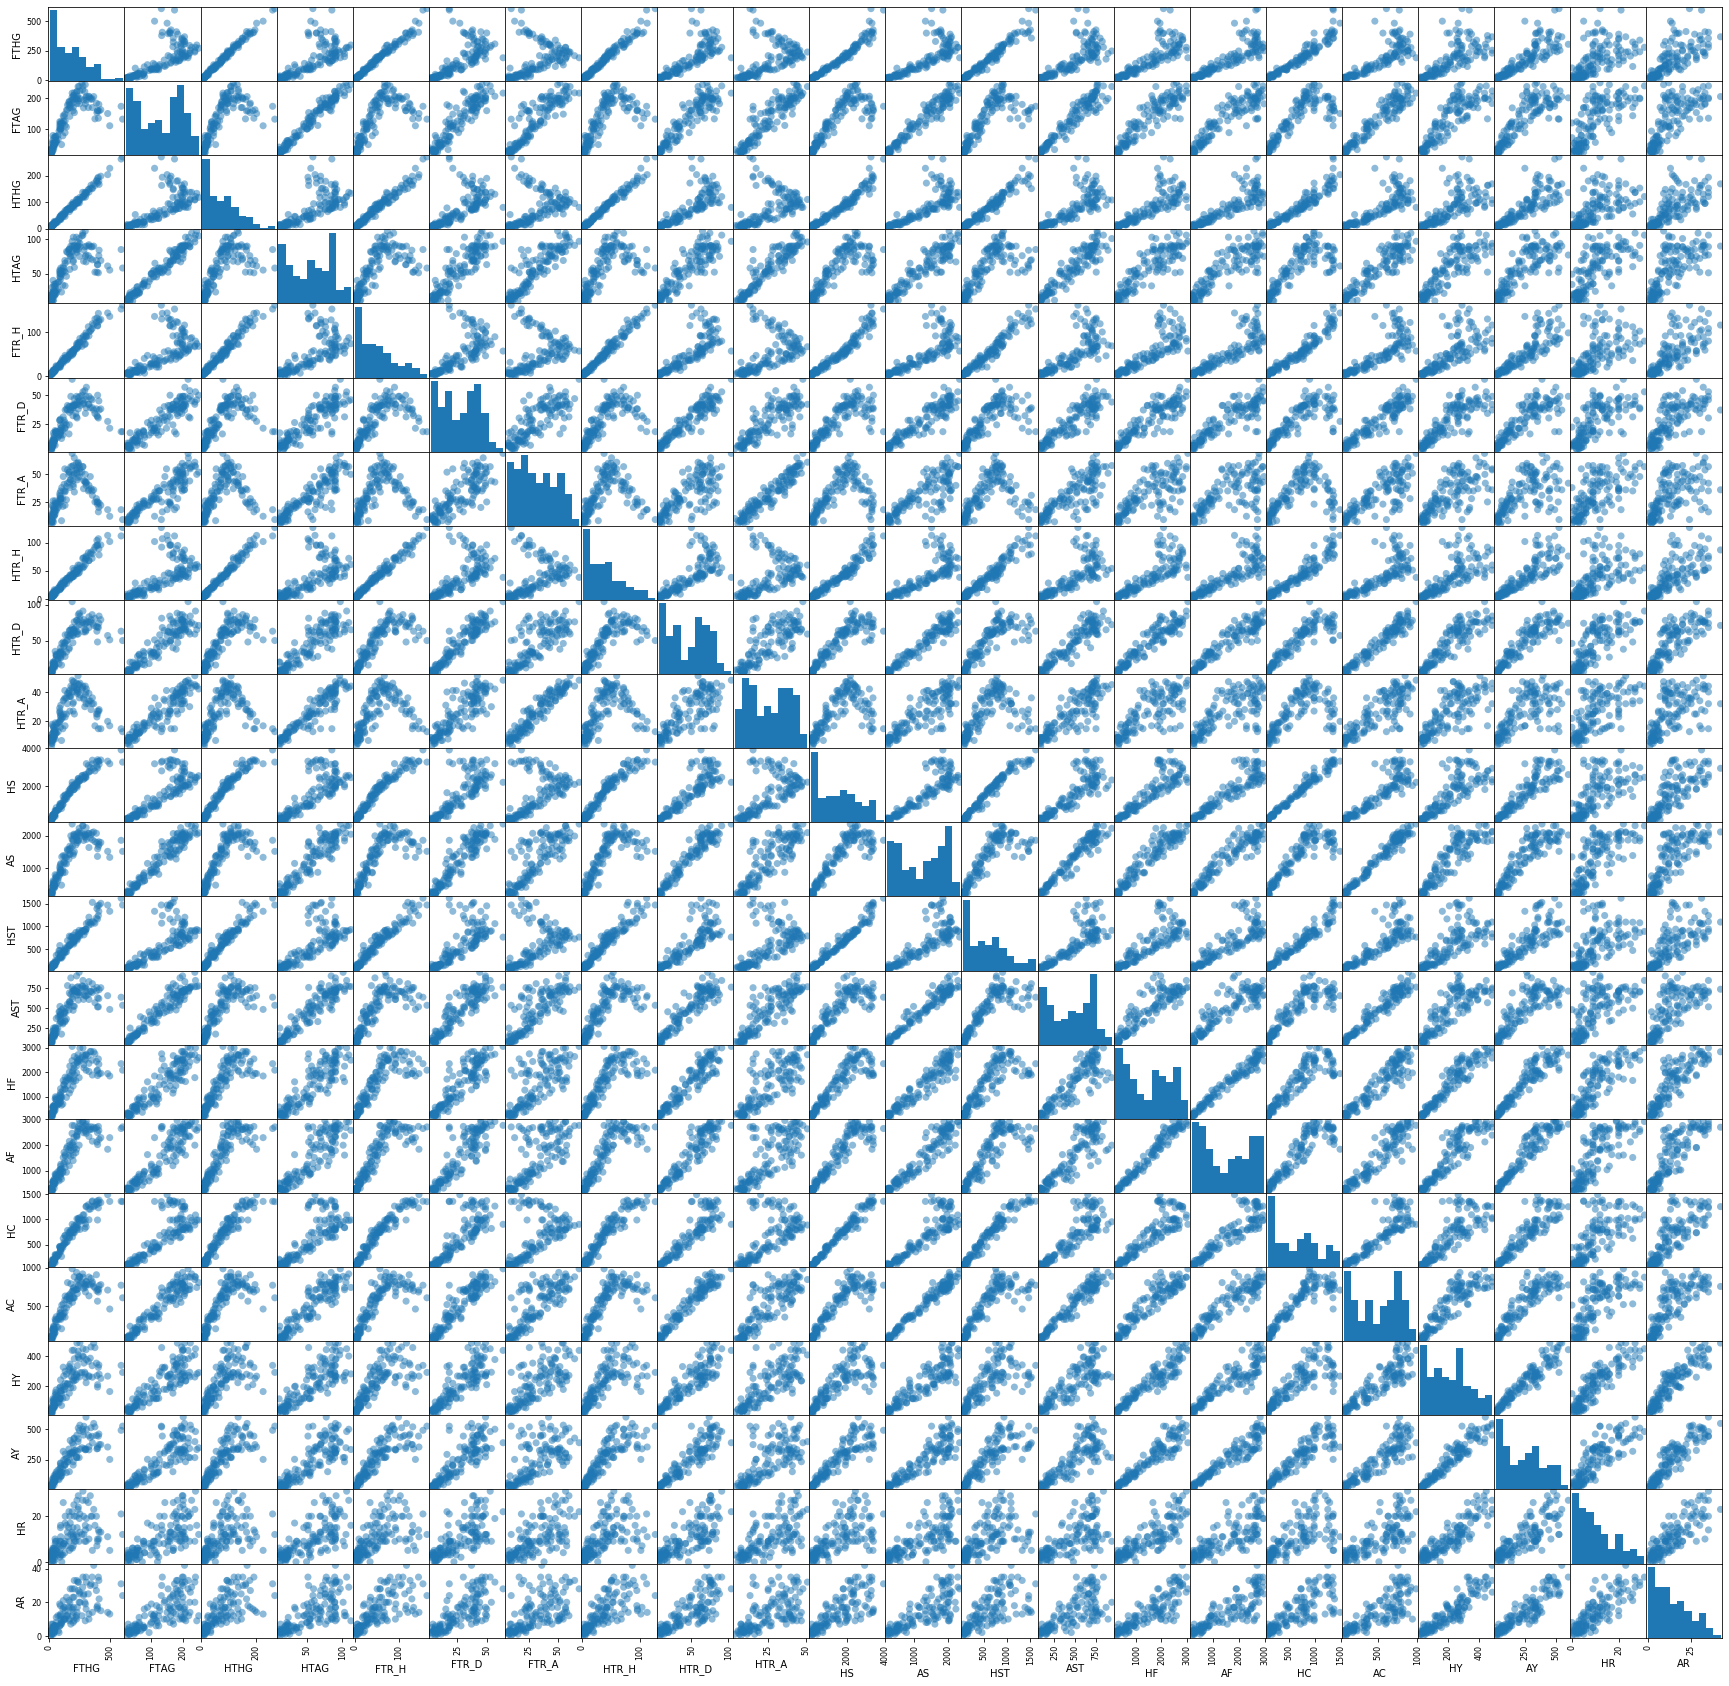

In [222]:
pd.plotting.scatter_matrix(home, figsize=(30,30), s=200);

In [ ]:
x = np.linspace(0,1, 500)
fig, ax = plt.subplots(figsize = (12,8))
fig.tight_layout()